# Password Analysis

Load the libraries.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the password data.

In [4]:
file_path = 'data/000webhost_subset.csv'
df = pd.read_csv(file_path)

Analyze the passwords.

In [5]:
unique_chars = set()
min_length = float('inf')
max_length = float('-inf')

for pwd in df['password']:
    unique_chars.update(set(pwd))
    min_length = min(min_length, len(pwd))
    max_length = max(max_length, len(pwd))


Insights

In [6]:
print('Unique characters:', ''.join(sorted(unique_chars)))
print(len(''.join(sorted(unique_chars))))
print('Smallest password length:', min_length)
print('Largest password length:', max_length)

Unique characters: !#$%&'()*+-./0123456789:<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~
91
Smallest password length: 1
Largest password length: 183


Histogram of password lengths

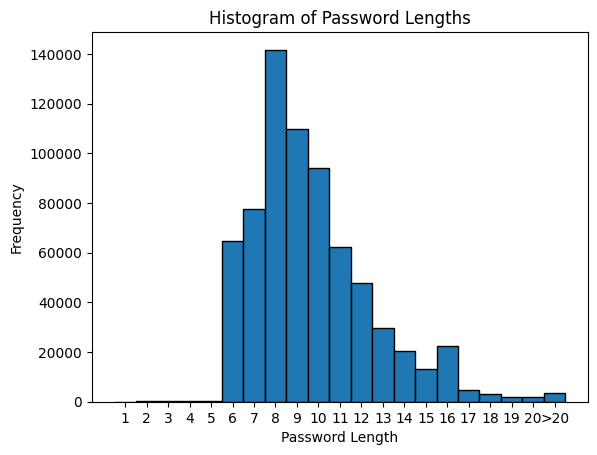

In [7]:
password_lengths = df['password'].apply(len)

max_display_length = 20
password_lengths_grouped = password_lengths.apply(lambda x: min(x, max_display_length + 1))

plt.hist(password_lengths_grouped, bins=np.arange(min_length, max_display_length + 3) - 0.5, edgecolor='k')
plt.xlabel('Password Length')
plt.ylabel('Frequency')
plt.xticks(np.arange(min_length, max_display_length + 2), labels=list(range(min_length, max_display_length + 1)) + [f'>{max_display_length}'])
plt.title('Histogram of Password Lengths')
plt.savefig("Password_Lengths_Histgram")
plt.show()


Average password length.

In [8]:
print('Average password length:', password_lengths.mean())
print('Median password length:', password_lengths.median())


Average password length: 9.688598571428571
Median password length: 9.0


Load the dataset with classificationns

In [18]:
file_path = 'data/000webhost_subset_classifed.csv'
df = pd.read_csv(file_path)

Calculate the proportions of each zxcvbn password strength class

Medium         0.319918
Weak           0.267195
Strong         0.246387
Very Strong    0.166500
Name: strength, dtype: float64


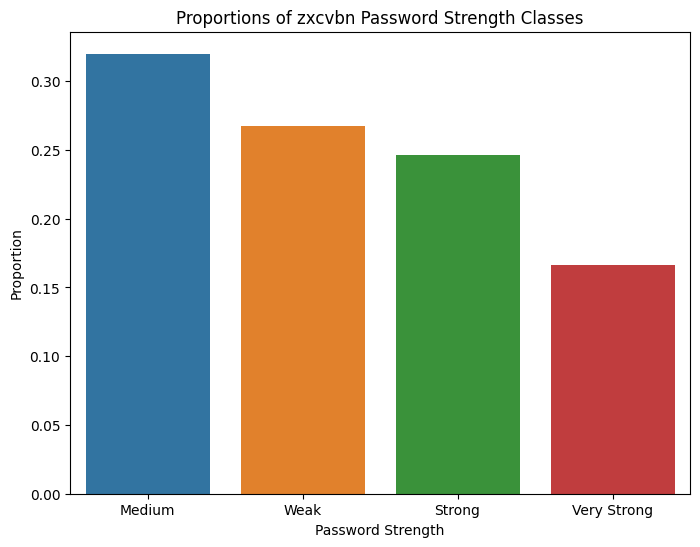

In [21]:
strength_counts = df['strength'].value_counts(normalize=True)

print(strength_counts)

plt.figure(figsize=(8, 6))
sns.barplot(x=strength_counts.index, y=strength_counts.values)
plt.xlabel('Password Strength')
plt.ylabel('Proportion')
plt.title('Proportions of zxcvbn Password Strength Classes')
plt.savefig("zxcvbn_Proportions")
plt.show()